http://www.ai-junkie.com/ann/som/som1.html

In [24]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

In [25]:
random.seed(42)

# this refers to the amount of columns in the input dataset
input_dimension = 3

# these dimensions govern the size of the SOM grid
output_dimension_x = 40
output_dimension_y = 40

# training iterations
number_of_iterations = 1000

# intial radius
sigma = min(output_dimension_x, output_dimension_y) / 2

# initial learning rate
alpha = 0.2 

In [26]:
red = [1, 0, 0]
green = [0, 1, 0]
blue = [0, 0, 1]
dark_green = [0, 0.5, 0.25]
dark_blue = [0, 0, 0.5]
yellow = [1, 1, 0.2]
orange = [1, 0.4, 0.25]
purple = [1, 0, 1]

train_data = [red, green, blue, dark_green, dark_blue, yellow, orange, purple]

In [27]:
def euclidean_distance(vector_1, vector_2):
    '''
    generic euclidean distance function for any 2 vectors
    '''
    return np.linalg.norm(vector_1 - vector_2)

def calculate_decay(iteration, num_iterations):
    '''
    this function is meant to slow down the learning rate
    '''
    return np.exp(-iteration / num_iterations)

def calculate_neighbour_penalty(distance, sigma):
    '''
    caculates bmu's influence based on distance
    '''
    return np.exp(- distance ** 2 / (2 * (sigma ** 2)))

def find_bmu(data_vector, som_grid):
    '''
    finds the best matching unit
    '''
    # intialize variable to track smallest distance
    smallest_distance = None
    # iterate over all rows in map
    for x_pos, row in enumerate(som_grid):
        # iterate over entries in row
        for y_pos, vector in enumerate(row):
            # distance between data vector and the weights of the current node
            distance = euclidean_distance(data_vector, vector)
            # check against and update smallest distance
            if (smallest_distance is None) or (distance < smallest_distance):
                    # update the shortest distance to the new shortest distance found
                    smallest_distance = distance
                    # set this node as the best matching unit (bmu)
                    bmu_position = np.array([x_pos, y_pos])
    return bmu_position

def update_weights(data_vector, bmu_position, som_grid, radius, learning_rate):
    '''
    updates weights of the SOM grid
    '''
    # iterate over all rows in the map 
    for x_pos, row in enumerate(som_grid):
        # iterate over entries in row
        for y_pos, vector in enumerate(row):
            # find the current position of the node
            current_position = np.array([x_pos, y_pos])
            # get distance from current node to bmu
            distance_to_bmu = euclidean_distance(current_position, bmu_position)
            # check whether current node is in the radius of the bmu
            if distance_to_bmu <= radius:
                # set the penalty coefficient proportional to how far the current (in radius) node is to the bmu
                node_penalty = calculate_neighbour_penalty(distance_to_bmu, radius)
                # update the node's weights
                som_grid[x_pos][y_pos] += node_penalty * learning_rate * (data_vector - vector)
    return som_grid

In [30]:
# 0. Temp step : synthetic data
#train_data = np.random.rand(50, input_dimension)

# 1. Initialize rectangular grid with random weights
som_grid = np.random.rand(output_dimension_x, output_dimension_y, input_dimension)

# Training loop
for iteration in range(number_of_iterations):
    # Auxiliary - set the learning rate to decay with each iteration
    learning_rate = alpha * calculate_decay(iteration, number_of_iterations)

    # 2. Choose a random vector form the dataset and present it to the lattice
    current_vector = train_data[random.randrange(0, len(train_data))]

    # 3. Find bmu (best matching unit)
    bmu_position = find_bmu(current_vector, som_grid)

    # 4. Calculate the radius of the neighbourhood of the BMU
    radius = sigma * calculate_decay(iteration, number_of_iterations)
    
    # 5. Weights of nodes within the radius are updated to make them more like the BMU. Closer nodes are adjusted more
    som_grid = update_weights(current_vector, bmu_position, som_grid, radius, learning_rate)

In [ ]:
plot_grid = np.reshape(som_grid, (output_dimension_x*output_dimension_y, input_dimension))

plt.scatter(*zip(*train_data))
plt.plot(*zip(*plot_grid))

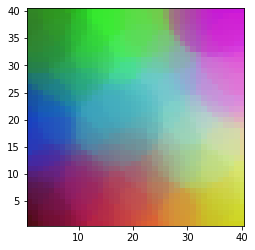

In [31]:
plt.imshow(som_grid, interpolation='nearest', 
                 extent=[0.5, 0.5 + output_dimension_x, 0.5, 0.5 + output_dimension_y])